# Исследование объявлений о продаже квартир

Нам предстоит исследовать рынок жилой недвижимости Санкт-Петербурга и его окрестностей с тем, чтобы выявить закономерности, которые могут пригодится для определения рыночной цены квартир и автоматического отслеживания аномалий.

### Загрузка данных и первое знакомство с ними

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('realty.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
Unnamed: 0              23699 non-null int64
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest   

In [3]:
data.describe()

,Unnamed: 0,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,11849.000000,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,6841.456351,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,5924.500000,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,11849.000000,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,17773.500000,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,23698.000000,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
data.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.sample(20)

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20741,20741,18,6999000.0,104.00,2016-05-28T00:00:00,2,NaN,6.0,56.00,2,...,25.00,0.0,Санкт-Петербург,22606.0,3057.0,2.0,473.0,3.0,332.0,511.0
14502,14502,4,3680000.0,36.00,2017-10-13T00:00:00,1,NaN,12.0,16.00,5,...,11.00,2.0,Санкт-Петербург,33749.0,14848.0,0.0,NaN,2.0,400.0,102.0
15838,15838,9,9750000.0,93.00,2017-08-08T00:00:00,3,NaN,23.0,NaN,9,...,NaN,0.0,Санкт-Петербург,7651.0,14065.0,0.0,NaN,0.0,NaN,58.0
5969,5969,0,5067000.0,76.00,2015-10-27T00:00:00,3,NaN,25.0,43.00,1,...,10.00,1.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,272.0
2705,2705,19,28570000.0,130.00,2017-10-02T00:00:00,4,NaN,4.0,92.80,2,...,12.50,NaN,Санкт-Петербург,20250.0,1637.0,3.0,226.0,3.0,60.0,501.0
13066,13066,16,4479300.0,86.60,2018-11-15T00:00:00,2,2.70,5.0,45.30,5,...,12.00,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,64.0
8610,8610,17,4250000.0,61.00,2015-08-14T00:00:00,3,2.50,9.0,42.80,6,...,6.30,2.0,Санкт-Петербург,51489.0,17158.0,0.0,NaN,0.0,NaN,589.0
17351,17351,11,5100000.0,73.30,2018-02-13T00:00:00,4,2.56,9.0,52.30,8,...,7.00,2.0,Санкт-Петербург,30145.0,13006.0,0.0,NaN,0.0,NaN,113.0
12524,12524,7,4700000.0,39.00,2017-11-09T00:00:00,1,2.80,16.0,18.00,12,...,13.00,NaN,Санкт-Петербург,17430.0,14791.0,0.0,NaN,0.0,NaN,22.0
13276,13276,0,4450000.0,38.00,2017-12-10T00:00:00,1,NaN,27.0,NaN,27,...,NaN,NaN,посёлок Парголово,52480.0,18657.0,0.0,NaN,0.0,NaN,76.0


In [6]:
data.tail()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В таблице много пропусков, и не все из них можно заполнить правдоподобными значениями, которые не исказят датасет. Например, вряд ли получится с помощью простых расчетов в pandas корректно заполнить недостающие расстояния до прудов, парков, аэропортов и центров городов. Если все строки с пропущенными значениями удалить, от датасета ничего не останется в прямом смысле. Если заполнить пропуски техническими значениями (допустим, -1), исказятся многие расчеты. Если оставить все как есть, не будут строиться некоторые графики (например, `boxplot`). Но последнюю проблему можно обойти, если строить график по срезу. Поэтому пропуски в столбцах типа `object` заполним словом 'неизвестно', а численные столбцы оставим как есть. Недостающие данные в `living_area` и `kitchen_area` можно было бы восстановить, опираясь на `total_area`, но данных во всех столбцах хватает и так, поэтому делать этого не будем.

Некоторые крайние значения явно ошибочны. Это касается минимального и максимального в `ceiling_height`, минимального в `last_price`. Их нужно отсеять в ходе предобработки.

Другие выглядят хоть и правдоподобно, но подозрительно: например, максимальное в `kitchen_area`. В задании сказано, что нас интересуют "типичные" параметры продаваемых квартир, поэтому эти выбросы мы учитывать не будем, но не станем и удалять их (на случай если они пригодятся для другого исследования), а отфильтруем на этапе анализа.

### Предобработка данных

Преобразуем данные в столбце с датой выставления квартиры на продажу в формат `datetime`.

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Судя по названию, столбец `is_apartment` должен содержать данные булева типа, но почему-то там `object`. Посмотрим, какие значения в нем встречаются, и если догадка верна, преобразуем в `bool`, исходя из того, что пропуски соответствуют значению `False` (предположим, что в несовершенном пользовательском интерфейсе была не одна галочка, которой можно было обозначить, что квартира относится к типу апартаментов, а два поля -- да, апартаменты и нет, не апартаменты, и владельцы обычных квартир при заполнении анкеты просто игнорировали оба).

In [8]:
data.is_apartment.unique()

array([nan, False, True], dtype=object)

In [9]:
data.is_apartment.fillna(0, inplace=True)
data.is_apartment = data.is_apartment.astype('bool')
data.is_apartment.unique()

array([False,  True])

Очистим датасет от возможных дубликатов и приведем все строковые столбцы к нижнему регистру.

In [10]:
data = data.drop_duplicates()
data.locality_name = data.locality_name.str.lower()

Предположим, что пропущенные значения в столбце `balcony` имеют ту же природу, что и в столбце `is_apartment`, и их корректно заполнить нулями.

In [11]:
data.balcony.fillna(0, inplace=True)

Очистим `last_price` от явно ошибочных значений. Для этого отсортируем таблицу по этому столбцу.

In [12]:
data.sort_values(by='last_price').head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,...,40.5,0.0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,17456,7,430000.0,30.4,2019-04-22,1,NaN,2.0,16.0,1,...,6.0,0.0,сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,14911,5,430000.0,54.0,2018-06-26,2,NaN,3.0,NaN,3,...,NaN,0.0,посёлок станции свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,16274,18,440000.0,40.0,2018-07-10,1,NaN,5.0,NaN,1,...,NaN,0.0,деревня старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,17676,0,450000.0,36.5,2018-02-01,1,NaN,5.0,17.3,4,...,8.5,1.0,деревня ям-тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


Явно ошибочное (или сознательно искаженное) значение обнаружилось только одно: это двушка площадью больше ста квадратных метров за 12 тыс. рублей. Возможно, кто-то пытался таким образом поднять свое объявление в поисковой выдаче. Удалим эту строку из датасета и посмотрим, что там с высотой потолков.

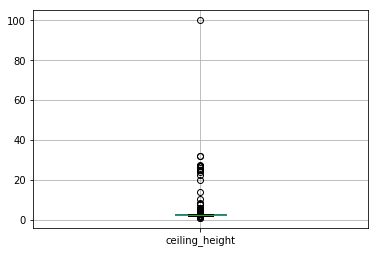

In [13]:
data.drop(labels=8793, inplace=True)
data.boxplot('ceiling_height')

На отшибе оказался тот самый 100-метровый потолок, который мы видели еще при первом вызове `describe()`. Есть и другие выбросы, но они не похожи на ошибочные значения (может быть, под жилье продают какие-нибудь заводские помещения или дворцы с потолками по 30 м), поэтому их удалять их не будем. Посмотрим на аномальные значения снизу.

(0, 4)

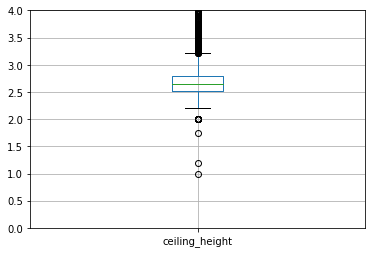

In [14]:
data.boxplot('ceiling_height')
plt.ylim(0, 4)

Значения ниже нижнего уса явно ошибочные. Удалим их и строку квартиры со 100-метровым потолком.

In [15]:
data = data.query('ceiling_height != 100 or ceiling_height > 2.2')

Добавим в таблицу несколько столбцов, которые пригодятся нам для дальнейшего анализа.

In [16]:
data['price_per_meter'] = data.apply(lambda row: row.last_price / row.total_area, axis=1) # цена за квадратный метр
data['weekday_posted'] = data.first_day_exposition.dt.weekday # в какой день недели была выставлена на продажу
data['month_posted'] = data.first_day_exposition.dt.month # ...месяц...
data['year_posted'] = data.first_day_exposition.dt.year # ...год...
data['living_total_ratio'] = data.apply(lambda row: row.living_area / row.total_area, axis=1) # жилая площадь к общей
data['kitchen_total_ratio'] = data.apply(lambda row: row.kitchen_area / row.total_area, axis=1) # кухонная площадь к общей


def define_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    # если дом одноэтажный, будем считать, что квартира в нем находится на первом этаже, а не на последнем
    if (row['floors_total'] > 1) & (row['floors_total'] - row['floor'] == 0):
        return 'последний'
    return 'другой'


data['floor_type'] = data.apply(define_floor_type, axis=1) # тип этажа -- первый, последний или ни то, ни то

Сделаем перекрестную проверку данных о расстояниях до парков/прудов и их численности, а также о площадях и этажности, чтобы убедиться, что в данных нет противоречий. <span style="color:green;font-size:200%">&#10003;</span>

In [17]:
print(len(data.query('ponds_nearest <= 3000').query('ponds_around3000 < 1')))
print(len(data.query('ponds_around3000 > 0').query('ponds_nearest > 3000')))
print(len(data.query('parks_nearest <= 3000').query('parks_around3000 < 1')))
print(len(data.query('parks_around3000 > 0').query('parks_nearest > 3000')))
print(len(data.query('kitchen_area > total_area')))
print(len(data.query('living_area > total_area')))
print(len(data.query('floor > floors_total')))

0
0
0
0
0
0
0


Осталось заполнить оставшиеся пропуски маркерами и переименовать ради единообразия один столбец -- и можно считать предобработку данных завершенной.

In [18]:
data.locality_name.fillna('неизвестно', inplace=True)
data.rename(columns={'is_apartment': 'apartment'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 30 columns):
Unnamed: 0              23698 non-null int64
total_images            23698 non-null int64
last_price              23698 non-null float64
total_area              23698 non-null float64
first_day_exposition    23698 non-null datetime64[ns]
rooms                   23698 non-null int64
ceiling_height          14503 non-null float64
floors_total            23612 non-null float64
living_area             21795 non-null float64
floor                   23698 non-null int64
apartment               23698 non-null bool
studio                  23698 non-null bool
open_plan               23698 non-null bool
kitchen_area            21420 non-null float64
balcony                 23698 non-null float64
locality_name           23698 non-null object
airports_nearest        18156 non-null float64
cityCenters_nearest     18179 non-null float64
parks_around3000        18180 non-null float64
parks_nea

In [19]:
to_int = ['balcony', 'floors_total']
data[to_int] = data[to_int].dropna().astype('int')

### Анализ данных

Нам нужно выделить типичные значения наиболее важных параметров продаваемых квартир -- цены (абсолютной и в пересчете на квадратный метр), общей площади, количества комнат. Для этого создадим функцию, которая построит диаграмму размаха для каждого значимого параметра и отфильтрует датасет, исключая из него выбросы.

In [20]:
data_filtered = data

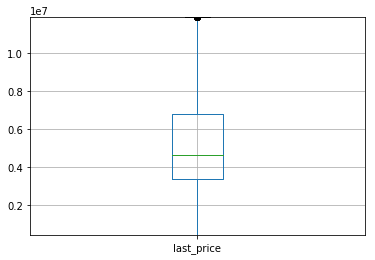

Нормальные значения: от 430000.0 до 11900000.0
В датасете осталось 21664 строк


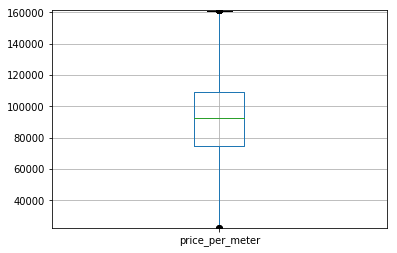

Нормальные значения: от 22448.350261219937 до 161231.68109209772
В датасете осталось 21120 строк


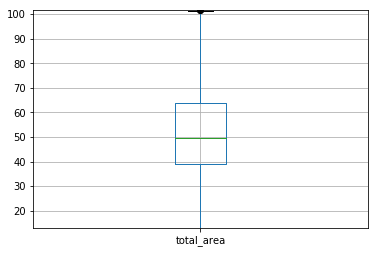

Нормальные значения: от 13.0 до 101.5
В датасете осталось 20700 строк


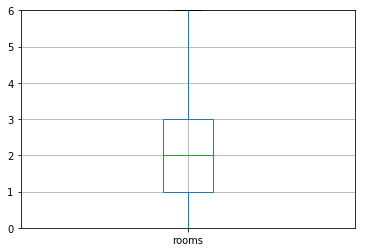

Нормальные значения: от 0 до 6.0
В датасете осталось 20700 строк


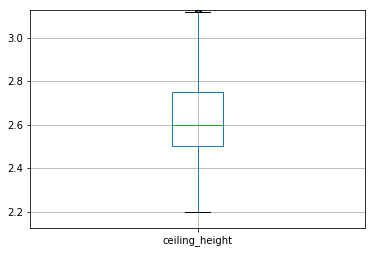

Нормальные значения: от 2.125 до 3.125
В датасете осталось 20095 строк
Количество строк в датафрейме сократилось на 3603


In [21]:
def make_boxplot(df, labels):
    num_rows_before = df.shape[0]
    for label in labels:
        q1 = df[label].describe()['25%']
        q3 = df[label].describe()['75%']
        upper_whisker = q3 + 1.5*(q3 - q1)
        lower_whisker = q1 - 1.5*(q3 - q1)
        if lower_whisker < 0:
            lower_whisker = 0
        if lower_whisker < df[label].min():
            lower_whisker = df[label].min()
        
        df.boxplot(label)
        plt.ylim(lower_whisker, upper_whisker)
        plt.show()
        print('Нормальные значения: от', lower_whisker, 'до', upper_whisker)
        df = df.loc[((df[label] >= lower_whisker) & (df[label] <= upper_whisker)) | (df[label].isnull())]
        print('В датасете осталось', len(df), 'строк')
        
    num_rows_after = df.shape[0]
    print('Количество строк в датафрейме сократилось на', num_rows_before - num_rows_after)
    return df       

data_filtered = make_boxplot(data_filtered, ['last_price', 'price_per_meter', 'total_area', 'rooms', 'ceiling_height'])   

В выборку попали крохотные квартиры общей площадью от 13 кв. м -- наверное, какие-нибудь мансарды. Оснований отбраковывать их у нас нет: они находятся между усами, во время предобработки столбцы с площадями были проверены на непротиворечивость.

Нулевые значения в столбце rooms можно принять за ошибку, но если посмотреть на соответствующие значения в столбцах `open_plan` и `studio`, становится ясно, что нули здесь появляются тогда и только тогда, когда квартира принадлежит к одному из двух этих типов, для которых характерно объединение жилого пространства с кухней.

In [22]:
aux_data = data[['rooms', 'studio', 'open_plan']].query('rooms == 0')
aux_data['studio'].sum() + aux_data['open_plan'].sum() == len(aux_data)

True

Посмотрим, за сколько дней квартиры обычно продаются (но фильтровать датасет по этому признаку не будем, так как слишком велика вероятность, что аномалии связаны с внешними факторами, а не со свойствами самих квартир).

(0, 480)

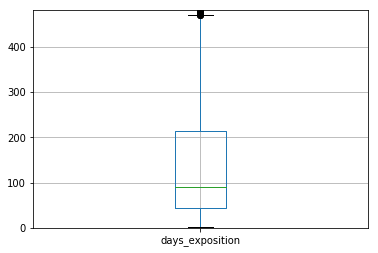

In [23]:
data_filtered.boxplot('days_exposition')
plt.ylim(0, 480)

In [24]:
data_filtered.describe()

,Unnamed: 0,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_posted,month_posted,year_posted,living_total_ratio,kitchen_total_ratio
count,20095.000000,20095.000000,2.009500e+04,20095.000000,20095.000000,11935.000000,20026.000000,18532.000000,20095.000000,18170.000000,...,5962.000000,14935.000000,7015.000000,17746.00000,20095.000000,20095.000000,20095.000000,20095.000000,18532.000000,18170.000000
mean,11854.353073,9.647176,4.684487e+06,51.694040,1.883901,2.645396,11.014881,29.532512,6.004081,9.429256,...,493.606005,0.676733,535.961654,169.64623,91263.905535,2.575765,6.389351,2017.385220,0.563141,0.190172
std,6836.766731,5.518549,2.033255e+06,16.691967,0.866245,0.151468,6.657213,12.033028,4.959484,3.595104,...,330.159560,0.863189,275.840620,208.13095,26746.784866,1.797452,3.491887,1.016315,0.103084,0.069969
min,1.000000,0.000000,6.500000e+05,13.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,...,1.000000,0.000000,16.000000,1.00000,22458.628842,0.000000,1.000000,2014.000000,0.038462,0.043524
25%,5932.500000,6.000000,3.300000e+06,38.500000,1.000000,2.500000,5.000000,18.000000,2.000000,7.000000,...,298.000000,0.000000,324.000000,43.00000,74740.285416,1.000000,3.000000,2017.000000,0.493047,0.136771
50%,11852.000000,9.000000,4.300000e+06,48.000000,2.000000,2.600000,9.000000,29.000000,4.000000,8.900000,...,459.000000,0.000000,523.000000,90.00000,92307.692308,3.000000,6.000000,2017.000000,0.566151,0.176810
75%,17762.500000,13.000000,5.700000e+06,62.000000,3.000000,2.740000,16.000000,38.000000,8.000000,11.000000,...,617.000000,1.000000,745.000000,214.00000,108402.192448,4.000000,10.000000,2018.000000,0.635039,0.235294
max,23698.000000,50.000000,1.190000e+07,101.400000,6.000000,3.120000,60.000000,88.000000,33.000000,50.000000,...,3190.000000,3.000000,1344.000000,1580.00000,161192.214112,6.000000,12.000000,2019.000000,1.000000,0.787879


Разница между средним и медианным значениями для большинства колонок существенно уменьшилась. Вот самые важные из типичных параметров продаваемых квартир:
* количество комнат до 6, в среднем чуть меньше 2
* общая площадь от 13 до 102 кв. м, в среднем 53 кв. м
* цена за квадратный метр от 22 до 162 тыс. рублей, среднее и медианное значения -- 92 и 93 тыс.
* стоимость за всю квартиру от 0,65 до 17,9 млн рублей
* в норме квартира проводит на рынке не более 480 дней, а половина всех квартир продается быстрее, чем за 100 дней

Какие факторы больше всего влияют на цену квартир? Чтобы ответить на этот вопрос, изучим матрицу корреляций `last_price`.

In [25]:
data_filtered.corr().loc['last_price'].reset_index().sort_values('last_price', ascending=False)

,index,last_price
2,last_price,1.000000
3,total_area,0.708007
21,price_per_meter,0.620288
7,living_area,0.572382
12,kitchen_area,0.463558
4,rooms,0.441092
5,ceiling_height,0.407571
6,floors_total,0.234498
1,total_images,0.163952
8,floor,0.157678


Что стоимость квартиры сильно связана с ее площадью и ценой квадратного метра, можно было догадаться и так, а вот менее очевидный факт: стоимость квартиры коррелирует с суммарной площадью комнат в большей степени, чем с площадью кухни или с количеством комнат (коэффициенты Пирсона 0,62, 0,52 и 0,47 соответственно). Все остальные корреляции слишком незначительны, чтобы принимать их во внимание.

Интересно, есть ли корреляции между какими-то другими параметрами квартир? Матрица получится большая, поэтому выведем ее в отсортированном виде.

In [26]:
pd.set_option('display.max_rows', 1000)
corr_list = data_filtered.corr().unstack()
print(corr_list.where(corr_list != 1).sort_values(ascending=False))
pd.reset_option('display.max_rows') 

living_area          total_area             0.902405
total_area           living_area            0.902405
rooms                living_area            0.895833
living_area          rooms                  0.895833
rooms                total_area             0.799897
total_area           rooms                  0.799897
                     last_price             0.708007
last_price           total_area             0.708007
floor                floors_total           0.670821
floors_total         floor                  0.670821
living_total_ratio   living_area            0.623076
living_area          living_total_ratio     0.623076
price_per_meter      last_price             0.620288
last_price           price_per_meter        0.620288
kitchen_total_ratio  kitchen_area           0.615903
kitchen_area         kitchen_total_ratio    0.615903
rooms                living_total_ratio     0.574065
living_total_ratio   rooms                  0.574065
living_area          last_price             0.

Любопытное наблюдение можно сделать по отрицательной части матрицы: чем ближе к концу исследуемого периода, тем быстрее продавались квартиры (`days_exposition` падает по мере увеличения `year_posted` и наоборот, коэффициент Пирсона -0,6).

Значимой корреляции цены квадратного метра с количеством комнат нет. Это может говорить как о том, что эти два параметра никак не связаны, так и о том, что их связь сложнее, чем обычная положительная или отрицательная связь. Сгруппируем даатсет по числу комнат и посмотрим, что происходит с ценой квадратного метра. Для этого создадим функцию, которая пригодится нам для аналогичных операций на следующих шагах. Она принимает на вход номера столбцов из нашего датасета в виде списка и рисует график, на котором видна зависимость медианной цены квадратного метра от соответствующих параметров.

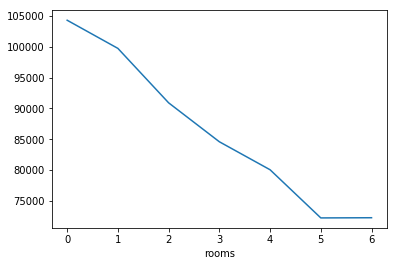

In [27]:
def price_per_meter_chart(labels):
    for label in labels:
        plt.figure()
        data_filtered.groupby(label)['price_per_meter'].median().plot()
        plt.show()

price_per_meter_chart(['rooms'])

Цена квадратного метра снижается по мере роста числа комнат в квартире от нуля до пяти, а потом выходит на какое-то странное слишком горизонтальное плато. Посмотрим, сколько в датасете осталось 5- и 6-комнатных квартир, и какая в этих двух категориях медианная цена квадратного метра. 

In [28]:
data_filtered.groupby('rooms')['price_per_meter'].agg(['median', 'count'])

,median,count
rooms,,
0,104316.770186,186
1,99747.122762,7656
2,90909.090909,7155
3,84585.988799,4530
4,80041.067762,540
5,72222.222222,27
6,72252.631579,1


Оказывается, в датасете осталась всего одна 6-комнатная квартира, и цена ее действительно близка к медианной по 5-комнатным. Изучать единственную 6-комнатную квартиру бесполезно, придется ее удалить.

In [29]:
data_filtered = data_filtered.query('rooms != 6')

Теперь выясним, влияет ли размещение квартиры на первом или последнем этаже на цену квадратного метра в ней.

In [30]:
data_filtered.groupby('floor_type')['price_per_meter'].median()

floor_type
другой       95590.187748
первый       80163.043478
последний    84126.984127
Name: price_per_meter, dtype: float64

Тут без сюрпризов: на первых этажах метры самые дешевые, на последнем чуть подороже, а на остальных этажах цена чуть выше среднего.

Есть ли связь между удаленностью от центра и ценой квадратного метра?

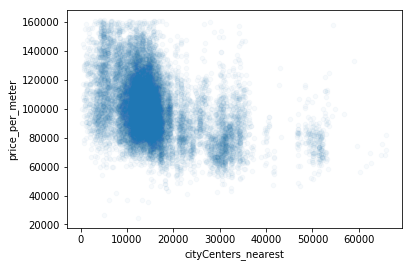

In [31]:
data_filtered.plot(x='cityCenters_nearest', y='price_per_meter', kind='scatter', alpha=0.03)

В центрах городов (еле заметная вертикальная полоса, расположенная на графике в районе отметки 4 км) есть и совсем дорогие квартиры, и варианты подешевле, а нижняя ценовая граница бошинства предложений -- около 80 тыс. рублей за метр. В зоне, которая соответствует спальным районам и пригородам Санкт-Петербурга, а также дальним окрестностям более мелких городов (темное пятно на удалении 10-20 км от центров), спектр предложений по мере удаления от центров становится шире: ставка за квадратный метр начинается примерно от 60 тыс, но и дорогих предложений почти столько же, сколько ближе к центру. По мере дальнейшего удаления от условного центра диапазон цен сужается при сохранении нижней границы на уровне в 50-60 тыс. рублей.

Изучим, как на цене квадратного метра отражается день недели, месяц и год, когда было вывешено объявление.

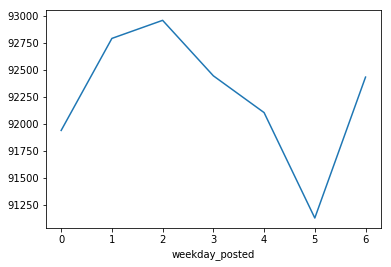

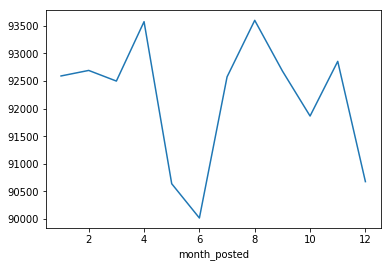

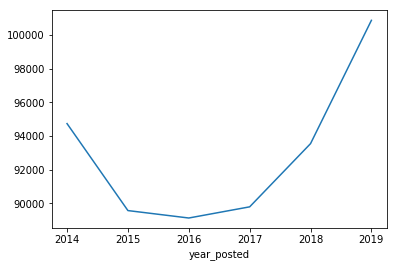

In [32]:
price_per_meter_chart(['weekday_posted', 'month_posted', 'year_posted'])

Выгоднее всего выставлять квартиру на продажу во вторник. В субботу лучше этого не делать. Самые неудачные месяцы для продажи квартиры -- июнь и декабрь, самые удачные -- апрель и август. На последнем графике видим другое проявление той же динамики, которую заметили в матрице корреляций. Там с течением времени падал срок экспозиции квартир, а здесь начиная с 2018 года резко растет цена квадратного метра (до этого два года наблюдалась стангнация, а еще годом раньше цены на рынке недвижимости упали). Спрос на квартиры вырос.

Посмотрим, какие населенные пункты лидируют по количеству объявленний.

In [33]:
data.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10)

locality_name
санкт-петербург      15720
посёлок мурино         522
посёлок шушары         440
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: last_price, dtype: int64

Поселок Мурино, второй по числу объявлений после Санкт-Петербурга, в апреле этого года получил статус города. То же самое, только годом раньше, случилось с деревней Кудрово, номер 9 в списке. Всеволожск и Выбобрг (4 и 10) -- тоже города, а все остальные населенные пункты из первой десятки административно входят в Санкт-Петербург. Причем Кудрово лежит в пределах Кольцевой автодороги, Мурино вплотную к ней примыкает, а Всеволожск удален от Санкт-Петербурга меньше, чем на 10 километров. То есть на самом деле все, кроме Выборга, это либо Санкт-Петербург, либо его пригороды. Посмотрим, как местоположение влияет на цену квадратного метра (статус Мурино и Кудрово менять не будем, потому что большую часть исследуемого периода они городами не были.)

In [34]:
# превращаем предыдущую группировку в список населенных пунктов, фильтруем по нему датасет и смотрим медицану цены метра
top10 = list(data.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10).index)
data_filtered.query('locality_name in @top10').groupby('locality_name')['price_per_meter'].median()\
.sort_values(ascending=False)

locality_name
санкт-петербург      101630.650403
пушкин                98437.500000
посёлок парголово     91917.591125
деревня кудрово       91803.278689
посёлок мурино        85878.462169
посёлок шушары        76923.076923
колпино               74723.748474
гатчина               67924.528302
всеволожск            65789.473684
выборг                58108.108108
Name: price_per_meter, dtype: float64

Опять обошлось без сюрпризов: даже административное деление в пределах Санкт-Петербурга влияет на цену квадратного метра. В наиболее удаленных от центра Санкт-Петербурга Всеволожске и Выборге и квадратный метр дешевле. 

Интересно, насколько велика будет разница, если всю недвижимость в датасете поделить на городскую и сельскую? Сначала посмотрим, какие значения в принципе есть `locality_name`.

In [35]:
data_filtered.locality_name.unique()

array(['посёлок шушары', 'санкт-петербург', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'деревня куттузи', 'сестрорецк', 'посёлок аннино',
       'посёлок плодовое', 'деревня заклинье', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет', 'село путилово',
       'ивангород', 'мурино'

Во многих случаях тип населенного пункта указан вместе с названием. Попробуем отфильтровать датасет по этому принципу.

In [36]:
data_filtered[~data_filtered['locality_name'].str.contains(
    'поселок|посёлок|деревня|село|садовое товарищество|садоводческое некоммерческое товарищество'
)]['locality_name'].unique()

array(['санкт-петербург', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'коммунар', 'колпино', 'гатчина', 'выборг', 'кронштадт', 'кировск',
       'павловск', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'сясьстрой', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зеленогорск', 'кудрово', 'сланцы', 'сосновый бор',
       'кириши', 'луга', 'волосово', 'отрадное', 'тихвин', 'подпорожье',
       'тосно', 'приморск', 'новая ладога', 'неизвестно', 'лодейное поле',
       'пикалёво', 'светогорск', 'любань', 'каменногорск', 'высоцк'],
      dtype=object)

Отлично. Видимо, данные о населенном пункте вносились автоматически, раз без всякой лемматизации получился такой чистый список. Он достаточно короткий, чтобы пробежать его глазами и убедиться, что все остальные населенные пункты в столбце `locality_name` -- это города (или части городов, как Петергоф). Теперь создадим новый столбец, в котором отделим города от сельских населенных пунктов и немногочисленных пропусков. Затем посмотрим, как отличается цена квадратного метра.

In [37]:
def define_locality_type(string):
    if 'поселок' in string or 'посёлок' in string or 'деревня' in string or 'село' in string or \
    'садовое товарищество' in string or 'садоводческое некоммерческое товарищество' in string:
        return 'село'
    if 'неизвестно' in string:
        return 'неизвестно'
    else:
        return 'город'

data_filtered['locality_type'] = data_filtered.locality_name.apply(define_locality_type)

data_filtered.query('locality_type == "город" or locality_type == "село"')\
.groupby('locality_type')['price_per_meter'].median()

locality_type
город    96457.317706
село     71875.000000
Name: price_per_meter, dtype: float64

Выходит, в Гатчине, Всеволожске и особенно Выборге цена метра недвижимости ниже сельской. Наверняка в значительной степени из-за таких "деревень", как Мурино и Кудрово. Кстати, на их примере удобно исследовать влияние статуса города на цену квадратного метра (сравнить цены на недвижимость до и после изменения статуса с поправкой на динамику рынка в целом).

Теперь сравним квартиры "в центре" и не в центре. Санкт-Петербург и так домиинирует в датасете, но все же отберем только строки с "санкт-петерубргом" в `locality_name`. За условную границу центра примем окружность радиусом не менее 4 км: с одной стороны, это чуть больше расстояния от Адмиралтейства до Московского вокзала или Обводного канала, с другой стороны -- как раз включает в себя ядро первой зоны, которую мы видели на диаграмме рассеивания выше. Еще один критерий -- в выборке должно оказаться не менее 1000 строк. Внешнюю границу исследуемой области проведем в 15 км от центра: сюда попадет территория в границах Кольцевой автодороги и часть пригородов.

In [38]:
downtown = data_filtered.query('cityCenters_nearest <= 5130 and locality_name == "санкт-петербург"')
len(downtown)

837

In [39]:
suburbs = data_filtered.query('5130 < cityCenters_nearest <= 15000 and locality_name == "санкт-петербург"')
len(suburbs)

8094

Cоставим таблицу, в которой данные будут представлены для обеих выборок с разбивкой по числу комнат.

In [40]:
# выделим интересующие нас столбцы
columns_of_interest = ['price_per_meter', 'total_area', 'cityCenters_nearest']

# посчитаем средние
downtown_grouped = downtown.groupby('rooms')[columns_of_interest].mean()
suburbs_grouped = suburbs.groupby('rooms')[columns_of_interest].mean()

# объединим таблицы
downtown_vs_suburbs = downtown_grouped.join(suburbs_grouped, lsuffix='_dt', rsuffix='_su')

# добавим информацию о количестве квартир с разным количеством комнат
downtown_vs_suburbs['count_dt'] = downtown.groupby('rooms')['last_price'].count()
downtown_vs_suburbs['count_su'] = suburbs.groupby('rooms')['last_price'].count()

# для наглядности изменим порядок столбцов
downtown_vs_suburbs[['price_per_meter_dt', 'price_per_meter_su', 'total_area_dt', 'total_area_su', 
                     'cityCenters_nearest_dt', 'cityCenters_nearest_su', 'count_dt', 'count_su']]

,price_per_meter_dt,price_per_meter_su,total_area_dt,total_area_su,cityCenters_nearest_dt,cityCenters_nearest_su,count_dt,count_su
rooms,,,,,,,,
0,129879.108030,123541.416904,19.525000,28.320312,3177.000000,11838.531250,4,64
1,130577.334441,113962.388745,41.408912,37.605261,4060.843537,11833.003025,147,2975
2,115759.214522,105545.284686,61.016738,54.567063,3591.134146,11414.980892,328,2983
3,107031.265851,95576.441415,75.776548,69.711051,3528.690391,11453.002189,281,1827
4,95565.955457,86454.023448,87.359722,73.161899,3495.291667,11410.649789,72,237
5,112751.056550,75545.497506,87.720000,75.700000,3161.200000,12313.125000,5,8


Делать вывыды о студиях/квартирах открытой планировки и о квартирах с числом комнат больше 4 мы не можем, слишком мало информации.

Разница в цене метра между центром и окраинами сильнее всего проявляется на однокомнатных квартирах, а слабее всего -- на четырехкомнатных. На 2-3-комнатных она примерно одинакова. Квартиры в центре просторнее, независимо от количества комнат. В обеих зонах чем ближе к центру, тем больше в среднем в квартире комнат, но двушки и трешки располагаются примерно на одинаковом удалении (3,61 и 11,35 км от центра соответственно) -- и это единственный сегмент, который можно выделить в обеих выборках.

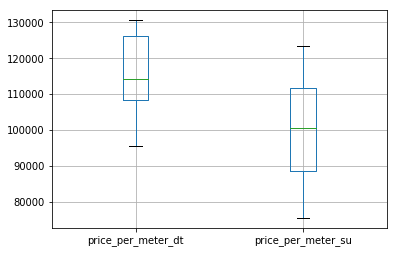

In [41]:
downtown_vs_suburbs.boxplot(['price_per_meter_dt', 'price_per_meter_su'])

Ценовая вилка в пригорордах шире, чем в центре, и цены в целом несколько ниже.

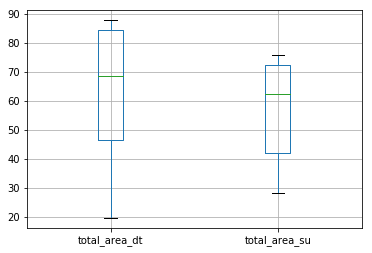

In [42]:
downtown_vs_suburbs.boxplot(['total_area_dt', 'total_area_su'])

Квартиры-студии и многокомнатные квартиры, которые мы не учитывали в разбивке по числу комнат, здесь заметно расширяют диапазон значений для центральной выборки.

Сравним корреляцию основных факторов в трех выборках: общей, центральной и пригородной.

In [43]:
compare_corrs = data_filtered.corr().loc['last_price'].reset_index().set_index('index').merge(
    downtown.corr().loc['last_price'].reset_index().set_index('index'), left_index=True, right_index=True).merge(
    suburbs.corr().loc['last_price'].reset_index().set_index('index'), left_index=True, right_index=True)

compare_corrs.columns = ['last_price_all', 'last_price_dt', 'last_price_su']

compare_corrs.sort_values('last_price_all', ascending=False).head(10)

,last_price_all,last_price_dt,last_price_su
index,,,
last_price,1.000000,1.000000,1.000000
total_area,0.708007,0.739269,0.826382
price_per_meter,0.620351,0.280717,0.398003
living_area,0.572402,0.603210,0.655490
kitchen_area,0.463527,0.339901,0.540244
rooms,0.441099,0.484781,0.483008
ceiling_height,0.407687,0.131728,0.424311
floors_total,0.234475,0.138311,0.221556
total_images,0.164027,0.080886,0.153852


В центре общая площадь квартиры коррелирует с ее ценой примерно так же, как и в общей выборке, а в пригороде коэффициент корреляции заметно выше (0,74, 0,71 и 0,83). Другими словами, в спальных районах главное достоинство квартиры -- ее общая площадь. 

Из следующих строк видно, что эта разница обеспечивается во многом вниманием к площади кухни и лишь в малой степени -- к площади жилых помещений и количеству комнат: в центре корреляция `kitchen_area` с итоговой ценой на 0,12 слабее, чем в общей выборке, а в пригородах -- на 0,08 сильнее. Разница между центром и пригородом очень заметная: 0,21. 

Еще можно сделать вывод, что продавцы и покупатели квартир в центре значительно меньше внимания уделяют высоте потолков: коэффициент Пирсона отличается на целых 0,29 (0,42 в общей и пригородной выборках против 0,13 в центральной).

Перейдем к изучению апартаментов, студий и квартир свободной планировки. Сравним их с остальными квартирами по средним значениям цены за квадратный метр, площади, срокам экспозиции и удаленности от центра. Для этого сначала создадим вспомогательный столбец с маркерами.

In [44]:
data_filtered.loc[
    (data_filtered['apartment'] == True) | 
    (data_filtered['studio'] == True) | 
    (data_filtered['open_plan'] == True), 
    'typical_or_not'] = 'untypical'

data_filtered.loc[
    (data_filtered['apartment'] != True) & 
    (data_filtered['studio'] != True) & 
    (data_filtered['open_plan'] != True), 
    'typical_or_not'] = 'typical'

len(data_filtered.query('typical_or_not == "untypical"'))

229

Выборка нетипичных квартир получилась совсем маленькая, но делать нечего.

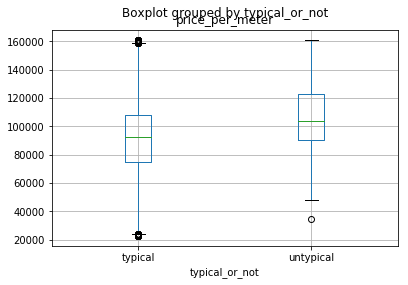

In [45]:
data_filtered.boxplot(column='price_per_meter', by='typical_or_not')

Ставка за квадратный метр в нетипичных квартирах начинается с 50 тыс. рублей, что почти в два раза дороже, чем у самых дешевых из обычных квартир. Дорогие квариры в обеих категориях стоят одинаково.

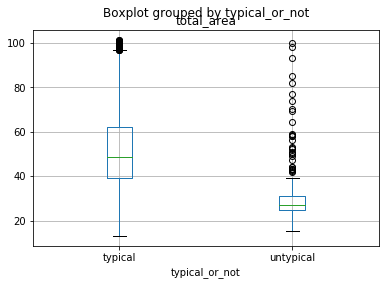

In [46]:
data_filtered.boxplot(column='total_area', by='typical_or_not')

Площадь нетипичных квартир не превышаает 40 кв. м. Обычные квартиры часто бывают в 2,5 раза больше.

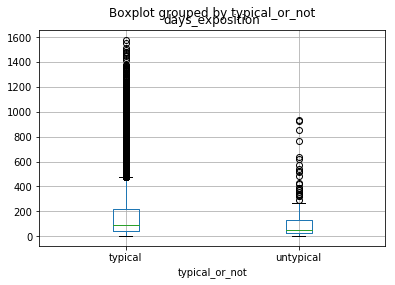

In [47]:
data_filtered.boxplot(column='days_exposition', by='typical_or_not')

Нетипичные квартиры обычно продаются значительно быстрее типичных. На целых 150 дней.

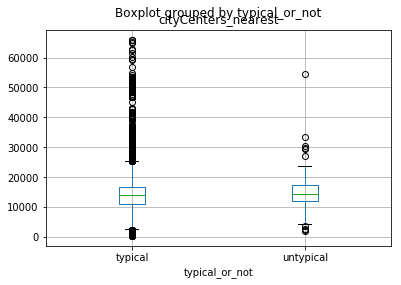

In [48]:
data_filtered.boxplot(column='cityCenters_nearest', by='typical_or_not')

По удаленности от центра значимых различий не видно. 

Посмотрим, отличаются ли корреляции между этими параметрами и общей ценой квартир в двух категориях.

In [49]:
typical_corr = data_filtered.query('typical_or_not == "typical"').corr().loc['last_price'].reset_index()\
.set_index('index')

untypical_corr = data_filtered.query('typical_or_not == "untypical"').corr().loc['last_price'].reset_index()\
.set_index('index')

compare_corrs_2 = typical_corr.merge(untypical_corr, left_index=True, right_index=True, suffixes=('_typ', '_untyp'))
compare_corrs_2.sort_values('last_price_typ', ascending=False).head(10)    

,last_price_typ,last_price_untyp
index,,
last_price,1.000000,1.000000
total_area,0.705212,0.825632
price_per_meter,0.629028,0.418379
living_area,0.568585,0.736552
kitchen_area,0.463910,0.323328
rooms,0.434408,0.601935
ceiling_height,0.412826,0.424008
floors_total,0.246930,-0.243002
floor,0.164634,-0.062304


В квартирах нетиповой планировки цена коррелирует с площадью сильнее, чем в обычных. Разница в строке `kitchen_area` объясняется тем, что в квартирах нетиповой планировки кухня совмещена с жилой площадью и отдельно не учитывается. Каждая лишняя комната сказывается на цене нетиповых квартир сильнее, чем типовых.

### Выводы

Мы исследовали рынок жилой недвижимости Санкт-Петербурга за последние пять лет и выявили основные параметры продаваемых квартир:

* количество комнат до 5, в среднем чуть меньше 2
* общая площадь от 13 до 115 кв. м, в среднем 53 кв. м
* цена за квадратный метр от 22 до 162 тыс. рублей, среднее и медианное значения -- 92 и 93 тыс.
* стоимость за всю квартиру от 0,65 до 17,9 млн рублей
* в норме квартира проводит на рынке не более 480 дней, а половина всех квартир продается быстрее, чем за 100 дней

Также удалось определить основные параметры, положительно коррелирующие со стоимостью квартиры (помимо ее размера):

* жилая площадь (с большим отрывом опережает следующие)
* площадь кухни
* количество комнат

Шестикомнатные квартиры (объекты с большим числом комнат не изучались) выделяются значительно более высокой ценой квадратного метра.

Получил подтверждение известный факт, что квартиры, расположенные не на первом и не на последнем этаже здания ценятся выше. 

О распределении цен по географическому признаку можно сказать следующее. В центрах городов есть и совсем дорогие квартиры, и варианты подешевле. Нижняя ценовая граница бошинства предложений -- около 80 тыс. рублей за метр. В зоне, которая соответствует спальным районам и пригородам Санкт-Петербурга, а также дальним окрестностям более мелких городов, спектр предложений по мере удаления от центров становится шире: минимальная ставка за квадратный метр опускается примерно до 60 тыс., но и дорогих предложений почти столько же, сколько ближе к центру. По мере дальнейшего удаления диапазон цен сужается при сохранении нижней границы на уровне в 50-60 тыс. рублей.

Годовой цикл рынка недвижимости характеризуется пиками активности в апреле и августе и спадами в июне и декабре. Оказалось, что существует и недельный цикл: в объявлениях, опубликованных во вторник, медианная цена квадратного метра выше, чем в опубликованных в субботу.

В течение пяти лет, которые охватывает это исследование, рынок недвижимости Ленинградской области пережил сначала спад, затем два года стагнации и, наконец, резкий рост начиная с 2018 года. Это видно как по росту цены квадратного метра, так и по снижению срока экспозиции квартир.

Медианная цена квадратного метра в зависимости от расположения квартиры варьируется от 102 тыс. в Санкт-Петербурге до 65 тыс. в его дальних пригородах и от 97 тыс. в городах Ленинградской области до 72 тыс. в сельских населенных пунктах.

Если рассмотреть Санкт-Петербург отдельно от всех остальных населенных пунктов, то разница в средней цене метра между его центром и окраинами сильнее всего проявляется на однокомнатных квартирах (17 тыс. рублей), а слабее всего -- на четырехкомнатных (7 тыс. рублей). На 2-3-комнатных она примерно одинакова (11 тыс. рублей). 

Квартиры в центре просторнее, независимо от количества комнат. В обеих зонах чем ближе к центру, тем больше в среднем в квартире комнат, но двушки и трешки располагаются примерно на одинаковом удалении (3,61 и 11,35 км от центра соответственно). Двух- и трехкомнатные квартиры имеют схожие характеристики, поэтому их можно выделить в единый сегмент.

Ценовая вилка в пригорордах Санкт-Петербурга шире, чем в центре, и цены в целом несколько ниже.

В центре общая площадь квартиры коррелирует с ее ценой примерно так же, как и в общей выборке, а в пригороде коэффициент корреляции заметно выше (0,74, 0,71 и 0,83). Другими словами, в спальных районах главное достоинство квартиры -- ее общая площадь. 

Из следующих строк видно, что эта разница обеспечивается во многом вниманием к площади кухни и лишь в малой степени -- к площади жилых помещений и количеству комнат: в центре корреляция площади кухни с итоговой ценой на 0,12 слабее, чем в общей выборке, а в пригородах -- на 0,08 сильнее. Разница между центром и пригородом очень заметная: 0,21. 

Еще можно сделать вывод, что продавцы и покупатели квартир в центре значительно меньше внимания уделяют высоте потолков: коэффициент Пирсона отличается на целых 0,29 (0,42 в общей и пригородной выборках против 0,13 в центральной).

Наконец, мы специально остановились на особенностях апартаментов, студий и квартир свободной планировки. Ставка за квадратный метр в таких квартирах начинается с 50 тыс. рублей, что почти в два раза дороже, чем у самых дешевых из обычных квартир. Дорогие квариры в обеих категориях стоят одинаково. Площадь апартаментов, студий и квартир свободной планировки очень редко превышаает 40 кв. м (обычные квартиры часто бывают в 2,5 раза больше), а продаются они обычно на целых 150 дней быстрее остальных. Каждая лишняя комната сказывается на цене нетиповых квартир сильнее, чем в случае обычных квартир.

Техническому специалисту, ответственному за выгрузку, сообщим, что в полученном датасете было два столбца с одинаковыми значениями (`area` и `total_area`).